## Emojify
The purpose of this project is to predict the right emojy for the input sentence.
The 5 emojies are ❤️, 😊, 😔, ⚾ and 🍴.

### import python modules

In [208]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import emoji
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import Data

In [209]:
data_train = pd.read_csv("data/train_emoji.csv")
X_train = data_train[data_train.columns[0]]
Y_train = data_train[data_train.columns[1]]

In [210]:
for i in range(10):
    print(X_train[i] + " " + label_emoji(Y_train[i]))

I am proud of your achievements 😊
It is the worst day in my life 😔
Miss you so much ❤️
food is life 🍴
I love you mum ❤️
Stop saying bullshit 😔
congratulations on your acceptance 😊
The assignment is too long  😔
I want to go play ⚾
she did not answer my text  😔


In [211]:
data_test = pd.read_csv("data/tesss.csv")
X_test = data_test[data_test.columns[0]]
Y_test = data_test[data_test.columns[1]]

In [212]:
for i in range(len(X_test) - 10, len(X_test)):
    print(X_test[i].split("\t")[0] + " " + label_emoji(Y_test[i]))

What you did was awesome 😊
ha ha ha lol 😊
I do not want to joke 😔
go away 😔
yesterday we lost again 😔
family is all I have ❤️
you are failing this exercise 😔
Good joke 😊
You deserve this nice prize 😊
I did not have breakfast  🍴


### AVG Model

#### Load The embeddings

In [213]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vec("data/glove.6B.50d.txt")
index_to_word

{0: 'the',
 1: ',',
 2: '.',
 3: 'of',
 4: 'to',
 5: 'and',
 6: 'in',
 7: 'a',
 8: '"',
 9: "'s",
 10: 'for',
 11: '-',
 12: 'that',
 13: 'on',
 14: 'is',
 15: 'was',
 16: 'said',
 17: 'with',
 18: 'he',
 19: 'as',
 20: 'it',
 21: 'by',
 22: 'at',
 23: '(',
 24: ')',
 25: 'from',
 26: 'his',
 27: "''",
 28: '``',
 29: 'an',
 30: 'be',
 31: 'has',
 32: 'are',
 33: 'have',
 34: 'but',
 35: 'were',
 36: 'not',
 37: 'this',
 38: 'who',
 39: 'they',
 40: 'had',
 41: 'i',
 42: 'which',
 43: 'will',
 44: 'their',
 45: ':',
 46: 'or',
 47: 'its',
 48: 'one',
 49: 'after',
 50: 'new',
 51: 'been',
 52: 'also',
 53: 'we',
 54: 'would',
 55: 'two',
 56: 'more',
 57: "'",
 58: 'first',
 59: 'about',
 60: 'up',
 61: 'when',
 62: 'year',
 63: 'there',
 64: 'all',
 65: '--',
 66: 'out',
 67: 'she',
 68: 'other',
 69: 'people',
 70: "n't",
 71: 'her',
 72: 'percent',
 73: 'than',
 74: 'over',
 75: 'into',
 76: 'last',
 77: 'some',
 78: 'government',
 79: 'time',
 80: '$',
 81: 'you',
 82: 'years',
 83

In [214]:
# converts a sentence to an avg embedding
def sentence_to_avg(sentence, word_to_vec_map = word_to_vec_map):
    words = [i for i in sentence.split()]
    embedding_shape = list(word_to_vec_map.values())[0].shape
    avg = np.zeros(shape = embedding_shape)
    count = 0
    for w in words:
        if w in word_to_vec_map:
            avg+=word_to_vec_map[w]
            count+=1
    
    if count > 0:
        avg = avg / count

    return avg

#### Model

In [215]:
## Create a model to predict the emoji
def Emojify_model(input_shape):
    
    input_embedding = tf.keras.Input(shape=input_shape)
    output = tf.keras.layers.Dense(units=5, activation="softmax")(input_embedding)
    model = tf.keras.Model(inputs = input_embedding, outputs = output)

    return model

In [216]:
## intiate the model
embedding_shape = list(word_to_vec_map.values())[0].shape # (50,0)

model = Emojify_model(embedding_shape)
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255 (1020.00 B)

 Trainable params: 255 (1020.00 B)

 Non-trainable params: 0 (0.00 B)

In [217]:
# X_train processing
X_train_avg_embeddings = []
for sentence in X_train:
    X_train_avg_embeddings.append(sentence_to_avg(sentence))

X_train_avg_embeddings = np.array(X_train_avg_embeddings)

# X_test processing
X_test_avg_embeddings = []

for sentence in X_test:
    X_test_avg_embeddings.append(sentence_to_avg(sentence))

X_test_avg_embeddings = np.array(X_test_avg_embeddings)

# Y_train processing
Y_oh_train = np.array(convert_to_oh(Y_train))

# Y_test processing
Y_oh_test = np.array(convert_to_oh(Y_test))

In [218]:
print(X_train_avg_embeddings.shape)
print(Y_oh_train.shape)
print(X_test_avg_embeddings.shape)
print(Y_oh_test.shape)


(131, 50)
(131, 5)
(55, 50)
(55, 5)


In [219]:
# fitting the model
model.fit(x=X_train_avg_embeddings, y=Y_oh_train, epochs=50, batch_size=16, validation_data=[X_test_avg_embeddings, Y_oh_test])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.2366 - loss: 1.7224 - val_accuracy: 0.2182 - val_loss: 1.6478
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2366 - loss: 1.6832 - val_accuracy: 0.2545 - val_loss: 1.6122
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2672 - loss: 1.6515 - val_accuracy: 0.3273 - val_loss: 1.5818
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2595 - loss: 1.6240 - val_accuracy: 0.3455 - val_loss: 1.5566
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2443 - loss: 1.6006 - val_accuracy: 0.3455 - val_loss: 1.5341
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2824 - loss: 1.5789 - val_accuracy: 0.3636 - val_loss: 1.5163
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2748 - loss: 1.5613 - val_accuracy: 0.4364 - val_loss: 1.4997
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2901 - loss: 1.5423 - val_accuracy: 0.4364 - val_loss: 1.4858


#### AVG Embeddings based model performance

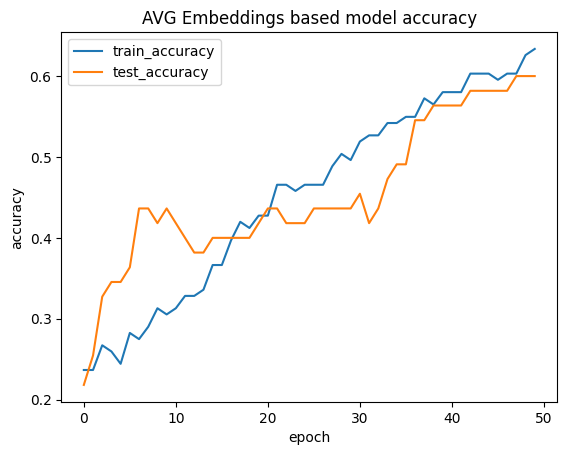

In [220]:
plt.plot(model.history.epoch, model.history.history["accuracy"])
plt.plot(model.history.epoch, model.history.history["val_accuracy"])
plt.title("AVG Embeddings based model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train_accuracy", "test_accuracy"])

In [221]:
sentence = "There's a new coffee place called trio"
emoji_prediction = model.predict(sentence_to_avg(sentence)[None, :])
print(sentence + " " + label_emoji(np.argmax(emoji_prediction)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
There's a new coffee place called trio 😊


### LSTM Model

#### Embedding layer (Transfer Learning)

In [222]:
## define sentence to indeices function
def sentences_to_indices(sentences, word_to_index, max_length):
    sentences = [i for i in sentences]
    words = []
    words_indices = np.zeros(shape=(len(sentences), max_length))
    for i in range(len(sentences)):
        words = [w.lower() for w in sentences[i].split()]
        for j in range(len(words)):
            if(words[j] in word_to_index.keys()):
                words_indices[i][j] = word_to_index[words[j]]

    return words_indices

In [223]:
sentences_to_indices(["i love you too", "fuck off"], word_to_index, 5)

array([[   41.,   835.,    81.,   317.,     0.],
       [35690.,   138.,     0.,     0.,     0.]])

In [224]:
### YOU CANNOT EDIT THIS CELL

# UNIT TEST
def sentences_to_indices_test(target):
    
    # Create a word_to_index dictionary
    word_to_index = {}
    for idx, val in enumerate(["i", "like", "learning", "deep", "machine", "love", "smile", '´0.=']):
        word_to_index[val] = idx + 1;
       
    max_len = 4
    sentences = np.array(["I like deep learning", "deep ´0.= love machine", "machine learning smile", "$"]);
    indexes = target(sentences, word_to_index, max_len)
    print(indexes)
    
    assert type(indexes) == np.ndarray, "Wrong type. Use np arrays in the function"
    assert indexes.shape == (sentences.shape[0], max_len), "Wrong shape of ouput matrix"
    assert np.allclose(indexes, [[1, 2, 4, 3],
                                 [4, 8, 6, 5],
                                 [5, 3, 7, 0],
                                 [0, 0, 0, 0]]), "Wrong values. Debug with the given examples"
    
    print("\033[92mAll tests passed!")
    
sentences_to_indices_test(sentences_to_indices)

[[1. 2. 4. 3.]
 [4. 8. 6. 5.]
 [5. 3. 7. 0.]
 [0. 0. 0. 0.]]
All tests passed!


In [225]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    vocab_size = len(word_to_vec_map.keys()) + 1
    embedding_shape = list(word_to_vec_map.values())[0].shape[0]
    embedding_matrix = np.zeros(shape=(vocab_size, embedding_shape))
    for word, idx in word_to_index.items():
        embedding_matrix[idx, :] = word_to_vec_map[word]

    embedding_layer = keras.layers.Embedding(vocab_size, embedding_shape, name="Embedding")
    embedding_layer.build((None,))
    embedding_layer.set_weights([embedding_matrix])

    return embedding_layer

In [226]:
pretrained_embedding_layer(word_to_vec_map, word_to_index)
from keras.layers import Embedding

#### Model

In [227]:
def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    # Input layer (name MUST be sentence_indices)
    sentence_indices = keras.layers.Input(shape=input_shape, dtype='int32', name='sentence_indices')

    # Pretrained embedding layer
    embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
    embeddings = embedding_layer(sentence_indices)

    # First LSTM (sequence)
    X = keras.layers.LSTM(128, return_sequences=True)(embeddings)
    X = keras.layers.Dropout(0.5)(X)

    # Second LSTM (final state)
    X = keras.layers.LSTM(128, return_sequences=False)(X)
    X = keras.layers.Dropout(0.5)(X)

    # Dense linear
    dense_out = keras.layers.Dense(5, activation='linear')(X)

    # Softmax activation, name MUST be X
    X = keras.layers.Activation('softmax', name='X')(dense_out)

    # Build model
    model = keras.models.Model(inputs=sentence_indices, outputs=X)

    return model


In [228]:
model = Emojify_V2((20,), word_to_vec_map, word_to_index)

In [229]:
# convert data to appropriate shape
X_train_indices = sentences_to_indices(X_train, word_to_index, 20)
X_test_indices = sentences_to_indices(X_test, word_to_index, 20)

Y_train_oh = convert_to_oh(Y_train)
Y_test_oh = convert_to_oh(Y_test)

In [230]:
# model compiling
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [231]:
# fit the mo
model.fit(x=X_train_indices, y=Y_train_oh, epochs=50, batch_size= 16, validation_data=[X_test_indices, Y_test_oh])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.2290 - loss: 1.6021 - val_accuracy: 0.2909 - val_loss: 1.5473
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.2672 - loss: 1.6231 - val_accuracy: 0.3273 - val_loss: 1.5206
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.2366 - loss: 1.6252 - val_accuracy: 0.3273 - val_loss: 1.5462
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.2977 - loss: 1.5876 - val_accuracy: 0.3273 - val_loss: 1.5117
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.2595 - loss: 1.5913 - val_accuracy: 0.3455 - val_loss: 1.5107
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.3053 - loss: 1.5146 - val_accuracy: 0.3273 - val_loss: 1.4498
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.3359 - loss: 1.4225 - val_accuracy: 0.3636 - val_loss: 1.3642
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.4504 - loss: 1.2181 - val_accuracy: 0.4727 - val_loss: 

#### LSTM based Model's Performance

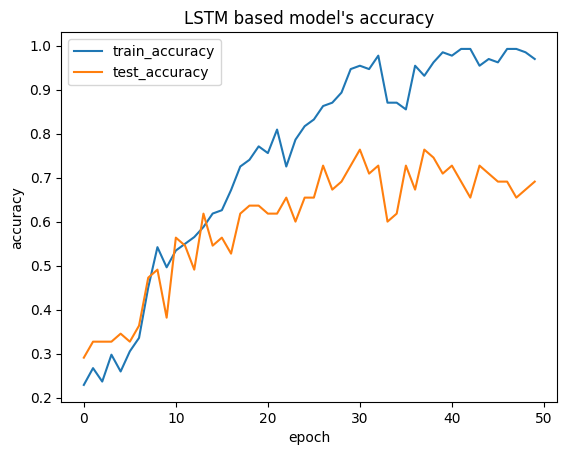

In [232]:
plt.plot(model.history.epoch, model.history.history["accuracy"])
plt.plot(model.history.epoch, model.history.history["val_accuracy"])
plt.title("LSTM based model's accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train_accuracy", "test_accuracy"])

The LSTM's based model performs better than the AVG Embeddings based Model